### Exploratory data analysis:
1.Missiing Value
2.Temporal Varible
3.Categorical Varible
4.Outliers
5.Relationship between Varibales

In [1]:
#import librarie for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read training data for analysis
df = open(r"C:\Users\user\Desktop\ML PROJECTS\Great_Motors_car_price\Datasets\Train.csv")
df = pd.read_csv(df)
df.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


### Statistical infornation

In [3]:
df.shape

(7205, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


In [8]:
df.describe()

,Amount (Million Naira),Distance,Amount
count,7188.000000,4.836000e+03,7188.000000
mean,11.847999,1.032390e+05,11.847999
std,25.318922,1.183734e+05,25.318922
min,0.450000,1.000000e+00,0.450000
25%,3.500000,5.235200e+04,3.500000
50%,5.650000,8.085900e+04,5.650000
75%,11.662500,1.176202e+05,11.662500
max,456.000000,1.985400e+06,456.000000


In [9]:
df.isnull().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)       0
Type                       196
Distance                  2352
Amount                       0
dtype: int64

In [10]:
df.drop_duplicates()
df.shape

(7188, 10)

### MIssing Values

In [11]:
# check total missing data
df.isnull().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)       0
Type                       196
Distance                  2352
Amount                       0
dtype: int64

In [12]:
df.isnull()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance,Amount
0,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
7200,False,False,False,False,False,False,False,False,False,False
7201,False,False,False,False,False,False,False,False,False,False
7202,False,False,False,False,False,False,False,False,True,False
7203,False,False,False,False,False,False,False,False,False,False


In [13]:
# rename target feature
 
df["Amount"] = df.iloc[:,6]

In [14]:
df.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance,Amount
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,2.2,Nigerian Used,NaN,2.2
1,VHL18827,Ibadan,Hyundai,Sonata,2012,Silver,3.5,Nigerian Used,125000.0,3.5
2,VHL19499,Lagos,Lexus,RX 350,2010,Red,9.2,Foreign Used,110852.0,9.2
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,22.8,Foreign Used,30000.0,22.8
4,VHL12170,Ibadan,Toyota,Highlander,2002,Red,2.6,Nigerian Used,125206.0,2.6


In [15]:
df.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance,Amount
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,2.2,Nigerian Used,NaN,2.2
1,VHL18827,Ibadan,Hyundai,Sonata,2012,Silver,3.5,Nigerian Used,125000.0,3.5
2,VHL19499,Lagos,Lexus,RX 350,2010,Red,9.2,Foreign Used,110852.0,9.2
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,22.8,Foreign Used,30000.0,22.8
4,VHL12170,Ibadan,Toyota,Highlander,2002,Red,2.6,Nigerian Used,125206.0,2.6


In [16]:
# drop columns where target varaible is not null
df = df[df.Amount.notnull()]

In [17]:
df.describe()

,Amount (Million Naira),Distance,Amount
count,7188.000000,4.836000e+03,7188.000000
mean,11.847999,1.032390e+05,11.847999
std,25.318922,1.183734e+05,25.318922
min,0.450000,1.000000e+00,0.450000
25%,3.500000,5.235200e+04,3.500000
50%,5.650000,8.085900e+04,5.650000
75%,11.662500,1.176202e+05,11.662500
max,456.000000,1.985400e+06,456.000000


In [18]:
df.isnull().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)       0
Type                       196
Distance                  2352
Amount                       0
dtype: int64

<AxesSubplot:>

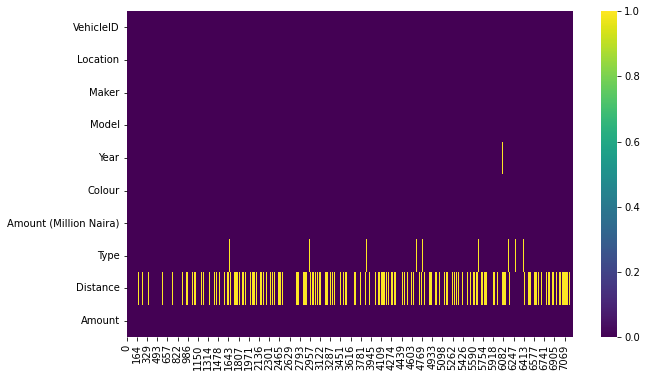

In [19]:
# visualize missing data
import seaborn as sns
plt.figure(figsize = (10,6))
sns.heatmap(df.isna().transpose(),cmap = "viridis")

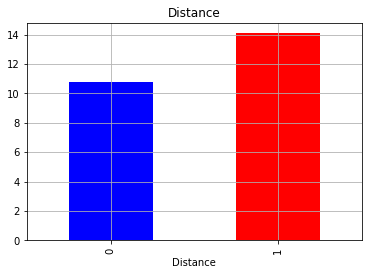

In [20]:
# visualize relationship between missing values in Distance  and target variable
data = df.copy()
data["Distance"] = np.where(data["Distance"].isnull(),1,0)

data.groupby("Distance")["Amount"].mean().plot.bar(color =["b","r"])
plt.title("Distance")
plt.grid()
plt.show()

# Its clearly seen that the nan value has effect on the target variable


##  Numerical Features


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7188 entries, 0 to 7204
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7188 non-null   object 
 1   Location                7188 non-null   object 
 2   Maker                   7188 non-null   object 
 3   Model                   7188 non-null   object 
 4   Year                    7167 non-null   object 
 5   Colour                  7188 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    6992 non-null   object 
 8   Distance                4836 non-null   float64
 9   Amount                  7188 non-null   float64
dtypes: float64(3), object(7)
memory usage: 875.8+ KB


In [22]:
# convert Distance column to float
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7188 entries, 0 to 7204
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7188 non-null   object 
 1   Location                7188 non-null   object 
 2   Maker                   7188 non-null   object 
 3   Model                   7188 non-null   object 
 4   Year                    7167 non-null   object 
 5   Colour                  7188 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    6992 non-null   object 
 8   Distance                4836 non-null   float64
 9   Amount                  7188 non-null   float64
dtypes: float64(3), object(7)
memory usage: 875.8+ KB


In [23]:
# remove comma from dataframe
df = df.replace(",","",regex = True)
df.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance,Amount
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,2.2,Nigerian Used,NaN,2.2
1,VHL18827,Ibadan,Hyundai,Sonata,2012,Silver,3.5,Nigerian Used,125000.0,3.5
2,VHL19499,Lagos,Lexus,RX 350,2010,Red,9.2,Foreign Used,110852.0,9.2
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,22.8,Foreign Used,30000.0,22.8
4,VHL12170,Ibadan,Toyota,Highlander,2002,Red,2.6,Nigerian Used,125206.0,2.6


In [24]:
df["Distance"]= df["Distance"].astype(float)
df.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance,Amount
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,2.2,Nigerian Used,NaN,2.2
1,VHL18827,Ibadan,Hyundai,Sonata,2012,Silver,3.5,Nigerian Used,125000.0,3.5
2,VHL19499,Lagos,Lexus,RX 350,2010,Red,9.2,Foreign Used,110852.0,9.2
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,22.8,Foreign Used,30000.0,22.8
4,VHL12170,Ibadan,Toyota,Highlander,2002,Red,2.6,Nigerian Used,125206.0,2.6


C:\Users\user\anaconda3\envs\great_motor\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Distance', ylabel='Density'>

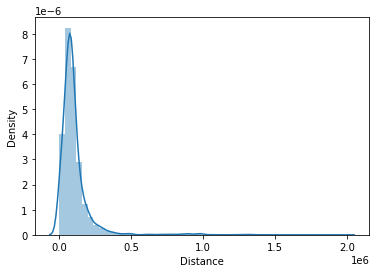

In [25]:
# check the distribution of of distance column
sns.distplot(df["Distance"])

In [26]:
df.describe()

,Amount (Million Naira),Distance,Amount
count,7188.000000,4.836000e+03,7188.000000
mean,11.847999,1.032390e+05,11.847999
std,25.318922,1.183734e+05,25.318922
min,0.450000,1.000000e+00,0.450000
25%,3.500000,5.235200e+04,3.500000
50%,5.650000,8.085900e+04,5.650000
75%,11.662500,1.176202e+05,11.662500
max,456.000000,1.985400e+06,456.000000


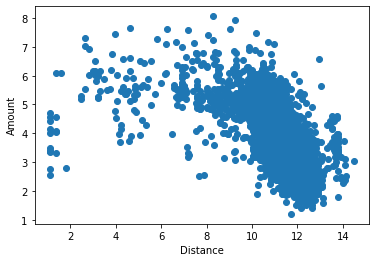

In [27]:
# scatter plot of distnace and amount
data = df.copy()
data["Distance"] = np.log(data["Distance"] + 2)
data["Amount"] = np.log(data["Amount"])
plt.scatter(data["Distance"],data["Amount"] + 2)
plt.xlabel("Distance")
plt.ylabel("Amount")
plt.show()

# The price of the car is expected to reduce as the mileage inceases which our scatter follows follows a bit not confident this miight be due to so many missing value

In [28]:
# Filling missing values in distnace and plotting the scatter
data = df.copy()
median_value = data["Distance"].median()

data["Distance"].fillna(median_value,inplace = True)

data.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance,Amount
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,2.2,Nigerian Used,80859.0,2.2
1,VHL18827,Ibadan,Hyundai,Sonata,2012,Silver,3.5,Nigerian Used,125000.0,3.5
2,VHL19499,Lagos,Lexus,RX 350,2010,Red,9.2,Foreign Used,110852.0,9.2
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,22.8,Foreign Used,30000.0,22.8
4,VHL12170,Ibadan,Toyota,Highlander,2002,Red,2.6,Nigerian Used,125206.0,2.6


In [29]:
data.corr()

,Amount (Million Naira),Distance,Amount
Amount (Million Naira),1.000000,-0.139965,1.000000
Distance,-0.139965,1.000000,-0.139965
Amount,1.000000,-0.139965,1.000000


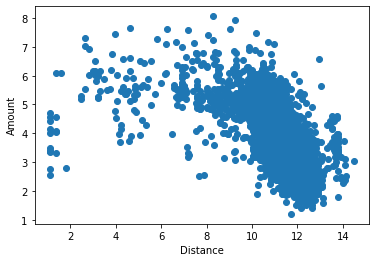

In [99]:
# scatter plot of distnace and amount
data = df.copy()
data["Distance"] = np.log(data["Distance"] + 2)
data["Amount"] = np.log(data["Amount"])
plt.scatter(data["Distance"],data["Amount"] + 2)
plt.xlabel("Distance")
plt.ylabel("Amount")
plt.show()

In [92]:
data.describe()

,Distance,Amount
count,4836.000000,7188.000000
mean,11.060010,1.880512
std,1.423484,0.948151
min,0.000000,-0.798508
25%,10.865745,1.252763
50%,11.300462,1.731656
75%,11.675216,2.456377
max,14.501331,6.122493


### Temporal Variable:Year


In [93]:
# conver year variable to  float
df["Year"] = df["Year"].astype(float)

In [94]:
df.describe()

,Year,Distance,Amount
count,7167.000000,4.836000e+03,7188.000000
mean,2011.031115,1.032390e+05,11.847999
std,4.853737,1.183734e+05,25.318922
min,1979.000000,1.000000e+00,0.450000
25%,2008.000000,5.235200e+04,3.500000
50%,2011.000000,8.085900e+04,5.650000
75%,2014.000000,1.176202e+05,11.662500
max,2022.000000,1.985400e+06,456.000000


In [95]:
# Add current year column
df["Current_year"] = 2022

In [102]:
# add car age
df["Age"] = df["Current_year"] - df["Year"]
df.describe()

,Year,Distance,Amount,Current_year,Age
count,7167.000000,4.836000e+03,7188.000000,7188.0,7167.000000
mean,2011.031115,1.032390e+05,11.847999,2022.0,10.968885
std,4.853737,1.183734e+05,25.318922,0.0,4.853737
min,1979.000000,1.000000e+00,0.450000,2022.0,0.000000
25%,2008.000000,5.235200e+04,3.500000,2022.0,8.000000
50%,2011.000000,8.085900e+04,5.650000,2022.0,11.000000
75%,2014.000000,1.176202e+05,11.662500,2022.0,14.000000
max,2022.000000,1.985400e+06,456.000000,2022.0,43.000000


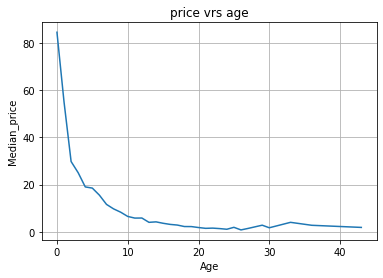

In [103]:
# checdk rel between year sold and saleprice
df.groupby("Age")["Amount"].median().plot()
plt.xlabel("Age")

plt.ylabel("Median_price")
plt.title("price vrs age")
plt.grid()
plt.show()
# The price decreases as the age of the car increases as expected

### Categorical Variables

In [30]:
df.info()
cat_features = [feature for feature in df.columns if df[feature].dtype == "O"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7188 entries, 0 to 7204
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7188 non-null   object 
 1   Location                7188 non-null   object 
 2   Maker                   7188 non-null   object 
 3   Model                   7188 non-null   object 
 4   Year                    7167 non-null   object 
 5   Colour                  7188 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    6992 non-null   object 
 8   Distance                4836 non-null   float64
 9   Amount                  7188 non-null   float64
dtypes: float64(3), object(7)
memory usage: 875.8+ KB


In [31]:
cat_features

['VehicleID', 'Location', 'Maker', 'Model', 'Year', 'Colour', 'Type']

In [32]:
# Ch:cking for uniques categories in each variable
for feature in cat_features:
    print(feature,":",df[feature].unique())

VehicleID : ['VHL12546' 'VHL18827' 'VHL19499' ... 'VHL12205' 'VHL17562' 'VHL15246']
Location : ['Abuja' 'Ibadan' 'Lagos']
Maker : ['Honda' 'Hyundai' 'Lexus' 'Mercedes-Benz' 'Toyota' 'Acura' 'Dodge'
 'Nissan' 'Kia' 'BMW' 'Volvo' 'Ford' 'Land Rover' 'Lincoln' 'Peugeot'
 'Chevrolet' 'Audi' 'Jaguar' 'Infiniti' 'Porsche' 'Fiat' 'Maserati'
 'Volkswagen' 'Suzuki' 'Bentley' 'GAC' 'Mazda' 'Scion' 'Renault'
 'Mitsubishi' 'Mini' 'Pontiac' 'Cadillac' 'Ferrari' 'Jeep' 'Buick'
 'Rolls-Royce' 'GMC' 'Chrysler' 'Lamborghini' 'Citroen' 'King' 'BAW'
 'Saturn' 'Tata' 'Opel' 'JAC' 'MG' 'Hummer' 'Subaru' 'Rover' 'Saab'
 'Skoda' 'IVM' 'Brabus']
Model : ['Accord Coupe EX V-6' 'Sonata' 'RX 350' ... 'Almera 1.6 Lux'
 'X5 3.0i Sports Activity' '320i SV Premium']
Year : ['2011' '2012' '2010' '2017' '2002' '2019' '2015' '2004' '2003' '2008'
 '2018' '2020' '2006' '2016' '2014' '2007' '2009' '2005' '2021' '2013'
 '2000' nan '1992' '2001' '1997' '1999' '1993' '1998' '1986' '1996' '2022'
 '1995' '1979' '1989']
Colour 

In [33]:
# Ch:cking for uniques categories in each variable
for feature in cat_features:
    print(feature,":Total number of categories is ",len(df[feature].unique()))

VehicleID :Total number of categories is  5129
Location :Total number of categories is  3
Maker :Total number of categories is  55
Model :Total number of categories is  1221
Year :Total number of categories is  34
Colour :Total number of categories is  21
Type :Total number of categories is  4


In [34]:
# check percentage of nan values in categorical features
df.isnull().sum()
# only type has ana value

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)       0
Type                       196
Distance                  2352
Amount                       0
dtype: int64

In [35]:
df[cat_features].head()

,VehicleID,Location,Maker,Model,Year,Colour,Type
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,Nigerian Used
1,VHL18827,Ibadan,Hyundai,Sonata,2012,Silver,Nigerian Used
2,VHL19499,Lagos,Lexus,RX 350,2010,Red,Foreign Used
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,Foreign Used
4,VHL12170,Ibadan,Toyota,Highlander,2002,Red,Nigerian Used


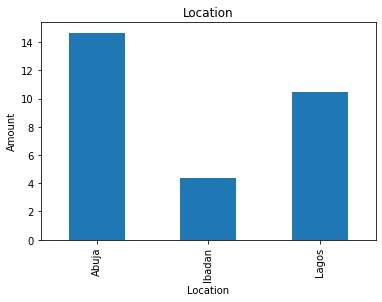

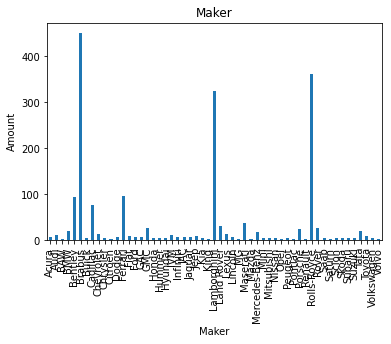

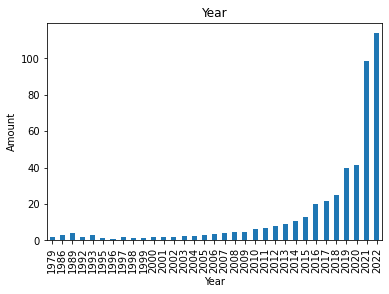

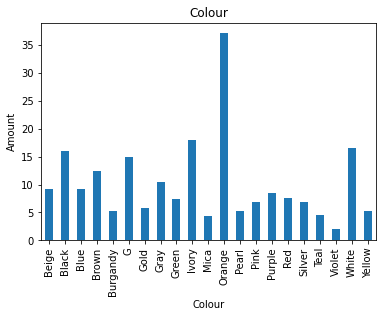

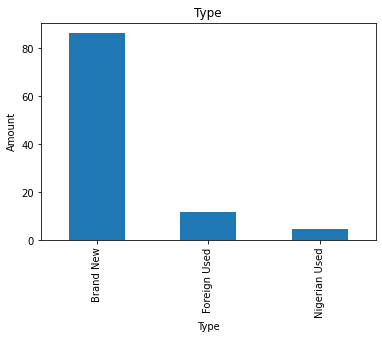

In [37]:
for feature in cat_features:
    if feature not in ["VehicleID","Model"]:
            data = df.copy()
            data.groupby(feature)["Amount"].mean().plot.bar()
            plt.xlabel(feature)
            plt.ylabel("Amount")
            plt.title(feature)
            plt.show()
#Lagos has the highest median amount price slightly higher than Abuja
# Ibadan has the lowest Median Sale Price

In [38]:
df["Colour"].value_counts()

Black       2118
Gray        1152
Silver      1120
White       1018
Blue         553
Red          478
Gold         356
Green        179
Brown        114
Burgandy      26
Beige         25
Purple        16
Orange        11
Yellow         7
Pink           7
Ivory          3
Violet         1
G              1
Teal           1
Mica           1
Pearl          1
Name: Colour, dtype: int64

### Outliers

In [126]:
# check ouliers in dsitance variable
data = df.copy()

C:\Users\user\anaconda3\envs\great_motor\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


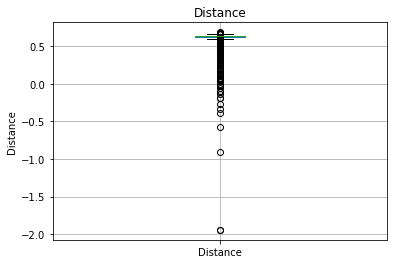

In [131]:
data["Distance"] = np.log(data["Distance"] + 2)
data.boxplot(column = "Distance")
plt.ylabel("Distance")
plt.title("Distance")
plt.show()

In [132]:
df.describe()

,Year,Distance,Amount,Current_year,Age
count,7167.000000,4.836000e+03,7188.000000,7188.0,7167.000000
mean,2011.031115,1.032390e+05,11.847999,2022.0,10.968885
std,4.853737,1.183734e+05,25.318922,0.0,4.853737
min,1979.000000,1.000000e+00,0.450000,2022.0,0.000000
25%,2008.000000,5.235200e+04,3.500000,2022.0,8.000000
50%,2011.000000,8.085900e+04,5.650000,2022.0,11.000000
75%,2014.000000,1.176202e+05,11.662500,2022.0,14.000000
max,2022.000000,1.985400e+06,456.000000,2022.0,43.000000


### Relationship between Variables

In [133]:
df.isnull().sum()

VehicleID          0
Location           0
Maker              0
Model              0
Year              21
Colour             0
Type             196
Distance        2352
Amount             0
Current_year       0
Age               21
dtype: int64

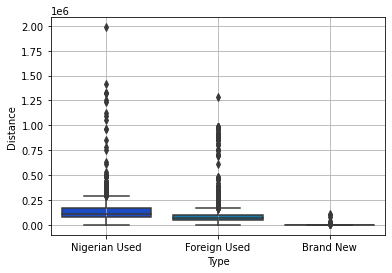

In [139]:
# Relationship between distance and type of car
# Brand new car is expected to must have travelled less distance as compared to foreign uesd and Nigerian use
# Filling the missing values based on the type of the car is logical

# plot box plot of distance based of Type
sns.boxplot(x="Type",y = "Distance",data = df,palette= "winter")
plt.grid()
# Mean distance for Nigerian used car is around 0.125 million
# Foreign used is around o.125/2 million and that of brand new is zero
nigerian = 0.125 *1000000
foreign = 0.0625 * 1000000
brand_new = 0

In [140]:
# replacing missing values in distance based on car type

nigerian = 0.125 *1000000
foreign = 0.0625 * 1000000
brand_new = 0
def input_distance(cols):
    Distance = cols[0]
    Type = cols[1]
    if pd.isnull(Distance):
        if Type == "Nigerian Used":
            return nigerian
        elif Type == "Foreign Used":
            return foreign
        else:
            return 0

In [158]:
# Check cars that were manufactured 2000 and above
df["Old"] = df["Year"].apply(lambda x:0 if x < 2013 else 1)
df.head()


,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance,Amount,Current_year,Age,Old
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011.0,Silver,Nigerian Used,NaN,2.2,2022,11.0,0
1,VHL18827,Ibadan,Hyundai,Sonata,2012.0,Silver,Nigerian Used,125000.0,3.5,2022,10.0,0
2,VHL19499,Lagos,Lexus,RX 350,2010.0,Red,Foreign Used,110852.0,9.2,2022,12.0,0
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017.0,Blue,Foreign Used,30000.0,22.8,2022,5.0,1
4,VHL12170,Ibadan,Toyota,Highlander,2002.0,Red,Nigerian Used,125206.0,2.6,2022,20.0,0


In [159]:
df["Old"].value_counts()

0    4407
1    2781
Name: Old, dtype: int64

In [160]:
data.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance,Amount,Current_year,Age,Old
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011.0,Silver,Nigerian Used,NaN,2.2,2022,11.0,1
1,VHL18827,Ibadan,Hyundai,Sonata,2012.0,Silver,Nigerian Used,125000.0,3.5,2022,10.0,1
2,VHL19499,Lagos,Lexus,RX 350,2010.0,Red,Foreign Used,110852.0,9.2,2022,12.0,1
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017.0,Blue,Foreign Used,30000.0,22.8,2022,5.0,1
4,VHL12170,Ibadan,Toyota,Highlander,2002.0,Red,Nigerian Used,125206.0,2.6,2022,20.0,0


Text(0.5, 0, 'Old')

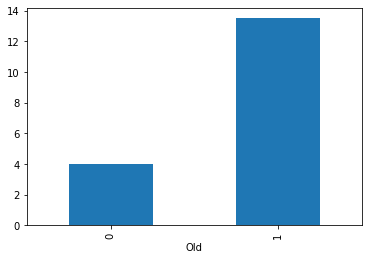

In [161]:
data = df.copy()
data.groupby("Old")["Amount"].median().plot.bar()
plt.xlabel("Old")

In [163]:
df.head(70)

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance,Amount,Current_year,Age,Old
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011.0,Silver,Nigerian Used,NaN,2.2,2022,11.0,0
1,VHL18827,Ibadan,Hyundai,Sonata,2012.0,Silver,Nigerian Used,125000.0,3.5,2022,10.0,0
2,VHL19499,Lagos,Lexus,RX 350,2010.0,Red,Foreign Used,110852.0,9.2,2022,12.0,0
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017.0,Blue,Foreign Used,30000.0,22.8,2022,5.0,1
4,VHL12170,Ibadan,Toyota,Highlander,2002.0,Red,Nigerian Used,125206.0,2.6,2022,20.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65,VHL12140,Abuja,Toyota,Highlander,2003.0,Gray,Nigerian Used,NaN,2.2,2022,19.0,0
66,VHL13856,Ibadan,Toyota,Camry,2007.0,Gray,Foreign Used,NaN,3.3,2022,15.0,0
67,VHL10705,Abuja,Honda,Accord,2013.0,Red,Nigerian Used,NaN,4.2,2022,9.0,1
68,VHL19331,Ibadan,Toyota,Camry,2010.0,Gold,Foreign Used,NaN,4.0,2022,12.0,0
